# Detecting Presence of Cardiac Disease
___

We are going work with a data set from kaggle that has information from medical checkups. The data set has information on 70,000 patients when they checked into a medical facilty. We will use information such a their weight, height, and blood pressure to predict if the patient had a cardiovascular disease. 

The column that we will do the prediction on has binary values. Therefore, we will use classification models for our machine learning project. These predictions can be used by hospitals to; take precaution, conduct advance testing, provide extra healthcare and potentially save lives. Cardiac disease cannot be diagnosed instantly without tests but by using these predictions problems can be detected in advance.

Column information:

* Age | int (days)
* Height | int (cm)
* Weight | float (kg)
* Gender | categorical code
* Systolic blood pressure | Examination Feature | ap_hi | int
* Diastolic blood pressure | Examination Feature | ap_lo | int
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
* Smoking | Subjective Feature | smoke | binary
* Alcohol intake | Subjective Feature | alco | binary
* Physical activity | Subjective Feature | active | binary
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary 

## Data Cleaning
___

In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cardio.csv', sep =';', index_col= 0, )  # read in the dataset

In [3]:
df.head()  # print out the first 5 rows

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,17474,1,156,56.00,100,60,1,1,0,0,0,0


0   0.50
1   0.50
Name: cardio, dtype: float64


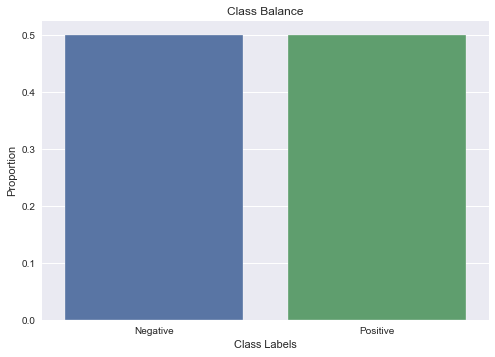

In [6]:
# check for class imbalace
print(df['cardio'].value_counts(normalize =True))
sns.barplot(y = df['cardio'].value_counts(normalize = True), x = ['Negative', 'Positive'] )
plt.ylabel('Proportion')
plt.xlabel('Class Labels')
plt.title('Class Balance')
plt.savefig('class_balance.png')

* Initially, the data set seems to be perfectly balanced in the target variable.

In [5]:
df.dtypes  # check the feature types

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
df.isnull().sum().any()  # check for any missing values

False

In [7]:
# change the gender column into their original categorical values so we can make dummy columns later
gender_dict = {1: 'female', 2: 'male'}  # make the mapping dictionary
df['gender'] = df.gender.map(gender_dict)
print(df.gender.value_counts())  # check the transformed column values

female    45530
male      24470
Name: gender, dtype: int64


In [8]:
df['age'] = df['age']/365  # convert age from days to years

In [9]:
df['height'] = df['height']/100  # convert height from CM to M

In [10]:
# create a mapping dictionary for the categorical columns about blood-sugar level
sugar_level_dict = {1: 'normal', 2:'above normal', 3:'well above normal'}

In [11]:
df['gluc'] = df['gluc'].map(sugar_level_dict)  # trasnform the columns into categorical
print(df.gluc.value_counts(dropna = False))

df['cholesterol'] = df['cholesterol'].map(sugar_level_dict)
print(df['cholesterol'].value_counts(dropna = False))  # check the values to confirm

normal               59479
well above normal     5331
above normal          5190
Name: gluc, dtype: int64
normal               52385
above normal          9549
well above normal     8066
Name: cholesterol, dtype: int64


In [12]:
df.active.value_counts()  # check the values of subjective columns 

1    56261
0    13739
Name: active, dtype: int64

In [13]:
df.describe()  # check the descriptive statistics for outlier values

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,53.34,1.64,74.21,128.82,96.63,0.09,0.05,0.80,0.50
std,6.76,0.08,14.40,154.01,188.47,0.28,0.23,0.40,0.50
min,29.58,0.55,10.00,-150.00,-70.00,0.00,0.00,0.00,0.00
25%,48.39,1.59,65.00,120.00,80.00,0.00,0.00,1.00,0.00
50%,53.98,1.65,72.00,120.00,80.00,0.00,0.00,1.00,0.00
75%,58.43,1.70,82.00,140.00,90.00,0.00,0.00,1.00,1.00
max,64.97,2.50,200.00,16020.00,11000.00,1.00,1.00,1.00,1.00


In [14]:
# restrict the data for patients over 3.33 feet and less than 7 feet
df = df[(df['height'] > 1) & (df['height'] < 2.125)].copy()  # 0.04% data was lost in total

In [15]:
# restrict weight between 30kg and 150kg
df = df[(df['weight'] > 30) & (df['weight'] < 150)].copy()  # 0.16% data was lost in total

In [16]:
# make a BMI column where BMI = weight(kg) / [height(m)]**2
df['bmi'] = df['weight']/(df['height']**2)

In [17]:
# restric BMI between 15 & 35
df = df[(df['bmi'] < 35) & (df['bmi'] > 15)].copy()

In [18]:
df.describe()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi
count,63709.00,63709.00,63709.00,63709.00,63709.00,63709.00,63709.00,63709.00,63709.00,63709.00
mean,53.23,1.65,71.63,127.90,94.67,0.09,0.05,0.81,0.48,26.36
std,6.77,0.08,11.45,152.96,185.61,0.29,0.23,0.40,0.50,3.73
min,29.58,1.25,32.00,-150.00,-70.00,0.00,0.00,0.00,0.00,15.01
25%,48.27,1.60,64.00,120.00,80.00,0.00,0.00,1.00,0.00,23.67
50%,53.92,1.65,70.00,120.00,80.00,0.00,0.00,1.00,0.00,25.86
75%,58.34,1.70,79.00,140.00,90.00,0.00,0.00,1.00,1.00,29.00
max,64.97,2.07,125.00,16020.00,10000.00,1.00,1.00,1.00,1.00,35.00


* We got rid of 9% of data by removing extreme values.
* Data is still very balanced in the target variable: `0.52 : 0.48`

In [19]:
bp_cols = {'ap_hi': 'bp_high',
           'ap_lo': 'bp_low'} # use a dictionary to fix the blood pressure column names

In [20]:
df.rename(columns= bp_cols, inplace= True)

In [21]:
df[['bp_high','bp_low']].describe()  # check their stats

,bp_high,bp_low
count,63709.00,63709.00
mean,127.90,94.67
std,152.96,185.61
min,-150.00,-70.00
25%,120.00,80.00
50%,120.00,80.00
75%,140.00,90.00
max,16020.00,10000.00


### Blood-Pressure Readings
___
These two columns mentioned right above, indicate values for Systolic Blood Pressure (bp_high) and Diastolic Blood Pressure (bp_low) of a patient. After doing some research, we found out the following information about these two features:

* The normal level of both these values paired are: `120 : 80`
* The upper reading is **_always_** higher than the lower reading.
* The abnormality of these values are categorized in different levels. For example, `200: 120` is very extreme on the higher end and `90 : 60` being extremely low.
* Therefore, negative values for these columns or values way above or below these thresholds need to be fixed.

Lets observe these extreme values now, so we can come up with a way to clean them.

In [22]:
df[df['bp_low'] <= 0]

,age,gender,height,weight,bp_high,bp_low,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
2845,62.22,male,1.67,59.00,906,0,normal,normal,0,0,1,0,21.16
19258,41.00,male,1.50,60.00,130,0,normal,normal,0,0,0,0,26.67
23512,56.05,female,1.56,50.00,138,0,well above normal,normal,0,0,1,1,20.55
24837,49.93,female,1.64,78.00,138,0,normal,normal,0,0,1,0,29.00
32749,58.03,male,1.66,68.00,149,0,normal,normal,0,0,1,1,24.68
36325,49.18,male,1.76,73.00,12,0,normal,normal,0,0,1,0,23.57
39577,64.10,male,1.80,73.00,140,0,normal,normal,1,1,1,1,22.53
45400,44.03,female,1.70,64.00,907,0,normal,normal,0,0,1,0,22.15
54780,63.58,male,1.70,81.00,148,0,normal,normal,0,0,1,0,28.03


In [23]:
df[df['bp_high'] <= 0] 

,age,gender,height,weight,bp_high,bp_low,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
6525,41.87,female,1.65,78.00,-100,80,above normal,normal,0,0,1,0,28.65
22881,60.57,male,1.61,90.00,-115,70,normal,normal,0,0,1,0,34.72
29313,42.69,female,1.53,54.00,-100,70,normal,normal,0,0,1,0,23.07
34295,50.14,female,1.62,74.00,-140,90,normal,normal,0,0,1,1,28.20
36025,40.30,male,1.68,50.00,-120,80,above normal,normal,0,0,0,1,17.72
50055,63.90,male,1.68,59.00,-150,80,normal,normal,0,0,1,1,20.90
66571,64.78,male,1.60,59.00,-120,80,normal,normal,0,0,0,0,23.05


* There is only one negative value in the bp_low column, therefore, we can remove the entry.
* However, there are plenty of zeros. We can impute this with the normal value of `80`.
* There are a few negative values in the bp_high column. However, if we look at them, we can tell that the input is wrong only because of the negative sign. We can transform this by multiplying by -1.

In [24]:
df['bp_high'] = df['bp_high'].apply(lambda x: x * (-1) if x < 0 else x)  # convert the ngtv values into positive

df = df[df['bp_low'] > 0].copy()  # remove the negative value in bp_low

df.loc[df['bp_low'] == 0, 'bp_low'] = 90 # replace 0 with 90 in bp_low

In [25]:
df[(df['bp_high'] >= 0) & (df['bp_high'] <= 25)]

,age,gender,height,weight,bp_high,bp_low,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
815,58.30,female,1.68,78.00,14,90,above normal,normal,0,0,1,1,27.64
1294,59.91,male,1.75,70.00,14,90,well above normal,normal,0,0,1,1,22.86
1360,49.93,female,1.72,65.00,11,80,normal,well above normal,0,0,1,0,21.97
2260,52.61,female,1.65,66.00,12,80,normal,normal,0,0,1,0,24.24
2301,61.89,female,1.65,71.00,14,80,normal,normal,0,0,1,1,26.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98039,58.13,female,1.60,59.00,12,80,normal,normal,0,0,1,0,23.05
98213,51.38,female,1.58,74.00,14,90,normal,normal,0,0,1,1,29.64
98568,52.35,female,1.54,77.00,14,90,normal,normal,0,0,1,0,32.47


After multiple observations of extreme values in the blood pressure columns. We found that:

* There are extremely high and low values for each columns.
* High values that have 4 or 5 integer places seemed to be inputed wrong in the way that extra 0's have been added to the end. We can fix this by dividing such value appropriately by multiples of 10.
* Some low values are missing a zero. Therefore, they need to be multiplied by 10.

In [26]:
df['bp_low'] = df['bp_low'].apply(lambda x: x/10 if (x >= 500) & (x <=2000) else
                               (x/100 if (x > 2000) else
                                (80 if x <=30 else x)))

In [27]:
df['bp_high'] = df['bp_high'].apply(lambda x: x/10 if (x >= 900) & (x <=2400) else
                                (x/100 if x> 2400 else
                                (x*10 if (x <= 24) & (x >= 0) else x)))

In [28]:
df[['bp_high','bp_low']].describe()  # check their stats

,bp_high,bp_low
count,63688.00,63688.00
mean,126.10,81.22
std,16.65,9.75
min,10.00,20.88
25%,120.00,80.00
50%,120.00,80.00
75%,140.00,90.00
max,401.00,190.00


In [29]:
# remove values where bp_high is lower than bp_low
df = df[df['bp_high'] > df['bp_low']].copy() 

In [30]:
df = df[df['bp_high'] <= 250 ]  # remove outliers

## Train - Test Split
___

In [31]:
# explore the cleaned data set
print(df.shape) 
df.head()

(63582, 13)


,age,gender,height,weight,bp_high,bp_low,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50.39,male,1.68,62.00,110.00,80.00,normal,normal,0,0,1,0,21.97
1,55.42,female,1.56,85.00,140.00,90.00,well above normal,normal,0,0,1,1,34.93
2,51.66,female,1.65,64.00,130.00,70.00,well above normal,normal,0,0,0,1,23.51
3,48.28,male,1.69,82.00,150.00,100.00,normal,normal,0,0,1,1,28.71
4,47.87,female,1.56,56.00,100.00,60.00,normal,normal,0,0,0,0,23.01


In [32]:
df.describe()

,age,height,weight,bp_high,bp_low,smoke,alco,active,cardio,bmi
count,63582.00,63582.00,63582.00,63582.00,63582.00,63582.00,63582.00,63582.00,63582.00,63582.00
mean,53.23,1.65,71.63,126.16,81.14,0.09,0.05,0.81,0.48,26.36
std,6.77,0.08,11.45,16.53,9.50,0.29,0.22,0.40,0.50,3.73
min,29.58,1.25,32.00,60.00,40.00,0.00,0.00,0.00,0.00,15.01
25%,48.27,1.60,64.00,120.00,80.00,0.00,0.00,1.00,0.00,23.66
50%,53.92,1.65,70.00,120.00,80.00,0.00,0.00,1.00,0.00,25.86
75%,58.34,1.70,79.00,140.00,90.00,0.00,0.00,1.00,1.00,29.00
max,64.97,2.07,125.00,240.00,182.00,1.00,1.00,1.00,1.00,35.00


* We need to shuffle the observations of the data frame before making a train-test split.
* This will enable the machine learning model to make better predictions.

In [33]:
shuffled_df = df.iloc[np.random.permutation(len(df))]  # shuffle the rows

In [34]:
# split the set in a 4:1 ratio
train_set = shuffled_df[:50865]
test_set = shuffled_df[50865:]

In [35]:
# save the split datasets into seprate csv files
train_set.to_csv('cardiac_train.csv', index = False)
test_set.to_csv('cardiac_test.csv', index = False)